In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 24.3 MB/s eta 0:00:00


In [2]:
ROBOFLOW_API_KEY = ''

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("brain-tumor-vgvlj").project("brain-tumor-8twd6")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain-Tumor-1 in yolov11:: 100%|██████████| 2812/2812 [00:01<00:00, 2257.19it/s]


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11l.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.0M/49.0M [00:00<00:00, 66.1MB/s]


In [ ]:
data_path = "/content/Brain-Tumor-1/data.yaml"

In [ ]:
train_results = model.train(
    data=data_path,
    epochs=100,
    imgsz=640
)

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Brain-Tumor-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Brain-Tumor-1/train/labels... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<00:00, 1350.33it/s]

train: New cache created: /content/Brain-Tumor-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Brain-Tumor-1/valid/labels... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<00:00, 1094.16it/s]

val: New cache created: /content/Brain-Tumor-1/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        11G      1.997      2.307      2.177          5        640: 100%|██████████| 62/62 [00:47<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.29it/s]

                   all        280        286          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G       2.17      2.004      2.263          9        640: 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]

                   all        280        286          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        11G      2.095      1.854      2.171          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        11G      2.068      1.792      2.167          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.117      0.168     0.0559     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G      2.017      1.594      2.142          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.103      0.196     0.0655     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.967      1.524      2.087         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        280        286      0.649       0.49      0.544      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        11G      1.922      1.422      2.076          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all        280        286      0.671      0.598      0.654      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G      1.904      1.411      2.022         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.742      0.661      0.743        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        11G       1.87      1.388      2.038          3        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.384      0.294      0.282     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      1.866      1.361      2.023          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        280        286      0.806      0.726      0.819      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G      1.875      1.305      2.015         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.732      0.685      0.756      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G      1.852      1.307      2.033          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.848      0.762      0.841        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        11G      1.873      1.266      2.018         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        280        286      0.776      0.706      0.769      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G      1.865      1.248      2.011          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        280        286      0.854      0.734      0.852      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        11G      1.791      1.155      1.969          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        280        286      0.862      0.825      0.871      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      1.814      1.161      1.965          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.796      0.668      0.752      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        11G      1.783      1.134      1.951          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.877      0.798      0.867      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G      1.806      1.143      1.947          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        280        286      0.835      0.787      0.844      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        11G      1.791       1.12      1.961         11        640: 100%|██████████| 62/62 [00:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.905      0.811      0.902      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.778      1.109      1.939          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.884      0.776       0.87      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        11G      1.736      1.062      1.931          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.873      0.871      0.918      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G      1.814      1.051      1.959          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        280        286      0.869      0.822       0.89      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G      1.742      1.039      1.902         11        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286        0.9      0.877      0.905      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      1.748      1.058      1.899          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.898      0.832      0.909      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.783      1.075      1.927          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        280        286      0.901      0.864      0.931      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.738       1.05      1.894          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.891      0.895      0.906      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G      1.753      1.029       1.92         11        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.889      0.844      0.893      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G      1.712      1.021      1.889          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.894      0.892      0.921      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G      1.735     0.9993      1.892          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.919      0.878      0.915      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      1.679     0.9492      1.853          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.906      0.846      0.901      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        11G       1.73     0.9797      1.885          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.899      0.794      0.881      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G      1.713      1.028      1.901          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]

                   all        280        286       0.93      0.871      0.937      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        11G      1.698      0.994      1.872          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.904      0.854      0.926      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        11G      1.666     0.9555      1.862          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286       0.94      0.875       0.94      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      1.712     0.9825      1.889          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286       0.93      0.878       0.93      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        11G      1.705     0.9644      1.869          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.916      0.853      0.916      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        11G      1.678     0.9537      1.838          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.932      0.858      0.928      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G      1.683     0.9358      1.843          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        280        286      0.914      0.839       0.92       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        11G      1.688     0.9408      1.853          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all        280        286       0.95      0.895      0.955      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G      1.651     0.9119      1.845          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.903      0.895      0.938      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        11G      1.676     0.9163      1.873          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.911      0.857      0.923      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G      1.691      0.931      1.867          3        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        280        286      0.944      0.892      0.952      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G      1.648     0.8936      1.833         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.903       0.86      0.909      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        11G      1.656     0.9434      1.838          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.925      0.902      0.952      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        11G      1.673     0.9155       1.85          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.922      0.907      0.951      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G      1.661     0.9113      1.829          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        280        286      0.945        0.9       0.96      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G      1.629     0.8837      1.812          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        280        286      0.916      0.885      0.945      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        11G      1.656     0.8985      1.836          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.941      0.839      0.923      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        11G      1.672     0.8996      1.837          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.934      0.836      0.928      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        11G      1.618     0.8766      1.792          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.921      0.885      0.935      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        11G      1.594      0.861      1.793          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.925      0.904      0.957      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        11G      1.629     0.8678      1.813          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.944      0.877      0.947      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        11G      1.641     0.8805      1.805          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        280        286      0.932      0.902      0.947      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        11G      1.634     0.8705      1.833          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.937      0.899      0.954      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        11G      1.636     0.8956      1.821          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all        280        286      0.927      0.885      0.946      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G       1.61     0.8575      1.808          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        280        286      0.944      0.889      0.952       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        11G       1.59      0.831      1.785          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286       0.95      0.923       0.96      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        11G      1.608     0.8508      1.803          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.929      0.927      0.963      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        11G      1.601     0.8368      1.793         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.953      0.916      0.968      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G       1.59     0.8241      1.773         11        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        280        286      0.952      0.908      0.952      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        11G      1.575     0.8155      1.797          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]

                   all        280        286      0.926      0.922      0.958        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        11G      1.588     0.8314      1.801          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        280        286      0.941      0.899      0.957      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        11G      1.578     0.8184      1.772          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        280        286      0.912      0.913      0.954      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G      1.564      0.822      1.755          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        280        286      0.966      0.906       0.97      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        11G      1.559     0.7875      1.761          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.953      0.899      0.952      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        11G      1.569     0.7906      1.783          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.927      0.909      0.955      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        11G       1.58     0.8164      1.755          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        280        286      0.972      0.895      0.963      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        11G      1.604     0.8335      1.805          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.961      0.923      0.971      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        11G      1.574     0.8197      1.793         11        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.956      0.922      0.964      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        11G      1.541     0.7947      1.733         10        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        280        286       0.95      0.906      0.959      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        11G      1.585     0.7846      1.759          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]

                   all        280        286      0.943      0.918      0.967      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        11G      1.554     0.7581      1.743          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.949      0.911      0.963      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        11G      1.522     0.7594      1.718          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286       0.93      0.923      0.969      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        11G       1.58     0.7969      1.747          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.937      0.927      0.957      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        11G      1.551     0.7985      1.743          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.956      0.904      0.964      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        11G      1.552      0.777      1.754          1        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.965      0.916      0.959      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        11G       1.52     0.7649      1.759          3        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        280        286      0.928      0.927      0.962      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        11G      1.525     0.7707      1.723          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        280        286      0.967      0.918      0.972      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        11G      1.531     0.7762      1.749          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286       0.96      0.913      0.972      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        11G       1.51     0.7447      1.727          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.953      0.909      0.968      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        11G      1.525      0.758      1.718          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.947      0.935      0.968      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        11G      1.515     0.7573      1.753          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        280        286      0.969      0.923      0.963      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        11G      1.513     0.7639      1.721          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.946      0.922      0.957      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        11G      1.509     0.7606      1.729          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        280        286      0.952      0.905      0.961      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        11G       1.47     0.7517      1.706          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.946      0.906      0.964      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        11G      1.506     0.7421      1.726          9        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286       0.96      0.923      0.972      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G      1.469     0.7385      1.689          7        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        280        286      0.944      0.927      0.964      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        11G      1.493     0.7288      1.708          8        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        280        286      0.956      0.916      0.972      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        11G      1.481      0.718      1.698          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.967      0.902      0.969      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        11G      1.486     0.7352      1.707          6        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.969       0.92       0.97      0.512


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G      1.469     0.5983      1.875          4        640: 100%|██████████| 62/62 [00:46<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.939      0.941      0.971      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        11G      1.445     0.5713      1.867          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        280        286      0.949       0.91      0.972      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        11G      1.455     0.5764      1.888          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286      0.952       0.93      0.971      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        11G      1.435     0.5602       1.85          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        280        286       0.95      0.933      0.964      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        11G      1.427     0.5596      1.854          5        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        280        286      0.957      0.925      0.969      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        11G       1.42     0.5589       1.86          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.945      0.934      0.969      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        11G      1.407     0.5704      1.851          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        280        286      0.955      0.934      0.973      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        11G        1.4     0.5691      1.852          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        280        286       0.96      0.925      0.974      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        11G      1.405     0.5431      1.836          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        280        286      0.956      0.922      0.971      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        11G      1.395     0.5559       1.84          4        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all        280        286      0.967      0.917      0.973       0.52



100 epochs completed in 1.460 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.23it/s]


                   all        280        286       0.95      0.933      0.964      0.522
Speed: 0.2ms preprocess, 14.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
model.val()

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /content/Brain-Tumor-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.65it/s]


                   all        280        286       0.95      0.931      0.964       0.52
Speed: 0.3ms preprocess, 31.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train32


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e17148c2aa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
pre_trained_model_weights = '/content/runs/detect/train3/weights/last.pt'
pre_trained_model = YOLO(pre_trained_model_weights)

In [ ]:
from PIL import Image
test_img_path = 'Brain-Tumor-1/test/images/y0_jpg.rf.afaa62917b3f3f301ee7008734d50d77.jpg'
save_dir = 'runs/detect/output'
conf = 0.5

In [ ]:
img1 = Image.open(test_img_path)
results = model.predict(source=img1, imgsz=640, conf=0.5, project=save_dir, name='', save=True)


0: 640x640 1 Tumor-Cell, 47.6ms
Speed: 3.1ms preprocess, 47.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/output/predict


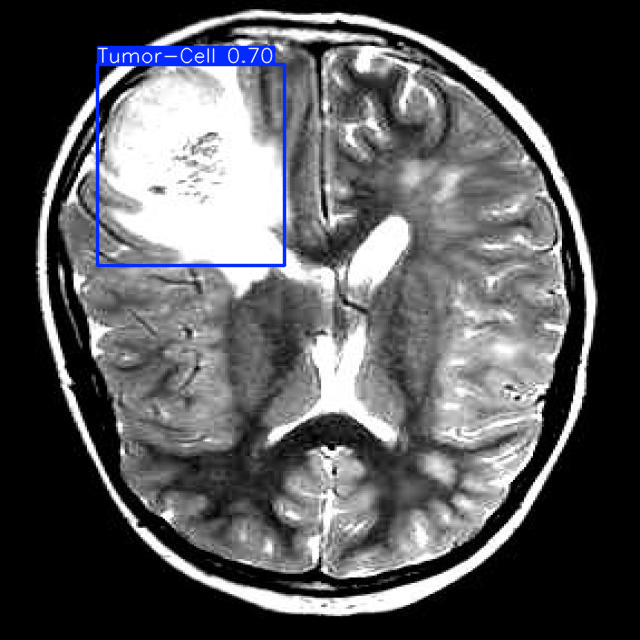

In [ ]:
for result in results:
    result.show()